# Tuning SVM hyperparameters on spambase dataset

There are two hyperparameters

1. C - the regularization parameter
2. gamma - the kernel bandwidth for the Gaussian kernel

Both the hyperparameters are optimized on the log-scale. The loss function here is the square root of the misclassification rate.

In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt
from fcvopt.metrics import mcr

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# loading dataset
dat = pd.read_csv('data/spambase.data',header=None)
X = dat.values[:,:-1]
y = dat.values[:,-1]

In [3]:
# define classifier object and the hyperparameter bounds
clf = Pipeline([('scale',StandardScaler()),
                 ('svc',SVC())])
param_bounds = {'svc__C':[np.exp(-10),np.exp(10)],
                'svc__gamma':[np.exp(-10),np.exp(10)]}

In [4]:
# optimizing square root of misclass rate
def sqrt_mcr(y_true,y_pred):
    return np.sqrt(mcr(y_true,y_pred))

# define optimizer object
opt = FCVOpt(clf,param_bounds,sqrt_mcr,kernel="matern",
             logscale=np.array([0,1]),max_iter=30,
             integer = [],
             seed=1234,verbose=2,
             n_folds=5,n_init=3)

# tune hyperparameters
opt.fit(X,y)

  iter    f_best   acq_best    sigma_f
     0 5.127e-01 3.650e-01 1.109e-01
     1 5.036e-01 3.890e-01 9.391e-02
     2 5.070e-01 4.177e-01 8.861e-02
     3 5.205e-01 4.061e-01 9.101e-02
     4 3.223e-01 1.442e-01 1.463e-01
     5 2.849e-01 8.584e-02 2.002e-01
     6 2.706e-01 1.042e-01 2.251e-01
     7 2.568e-01 1.226e-01 2.040e-01
     8 2.573e-01 1.939e-01 2.115e-01
     9 2.575e-01 2.055e-01 2.135e-01
  iter    f_best   acq_best    sigma_f
    10 2.572e-01 2.263e-01 1.800e-01
    11 2.556e-01 2.310e-01 1.904e-01
    12 2.541e-01 2.257e-01 2.202e-01
    13 2.516e-01 2.296e-01 2.115e-01
    14 2.514e-01 2.330e-01 1.934e-01
    15 2.506e-01 2.373e-01 2.178e-01
    16 2.489e-01 2.349e-01 2.688e-01
    17 2.508e-01 2.421e-01 2.242e-01
    18 2.541e-01 2.446e-01 2.072e-01
    19 2.538e-01 2.430e-01 2.095e-01
  iter    f_best   acq_best    sigma_f
    20 2.526e-01 2.423e-01 2.304e-01
    21 2.528e-01 2.433e-01 2.124e-01
    22 2.536e-01 2.382e-01 2.055e-01
    23 2.538e-01 2.455e-01 2.028

{'x_best': array([2.20264658e+04, 4.53999298e-05]),
 'f_best': 0.2523323128950991,
 'acq_cand': 0.24455093666485803,
 'x_cand': array([2.20264658e+04, 4.53999298e-05])}

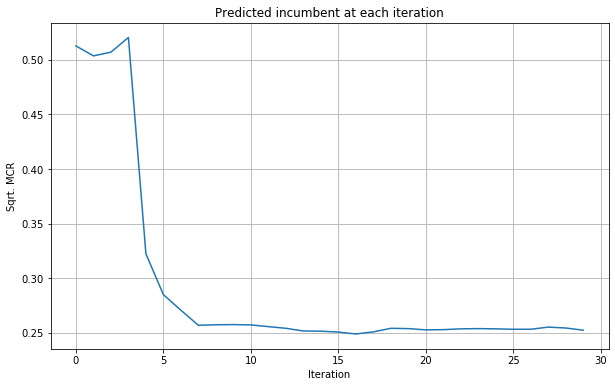

In [5]:
plt.figure(figsize=(10,6))
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Sqrt. MCR')
plt.title('Predicted incumbent at each iteration')
plt.grid()
plt.show()

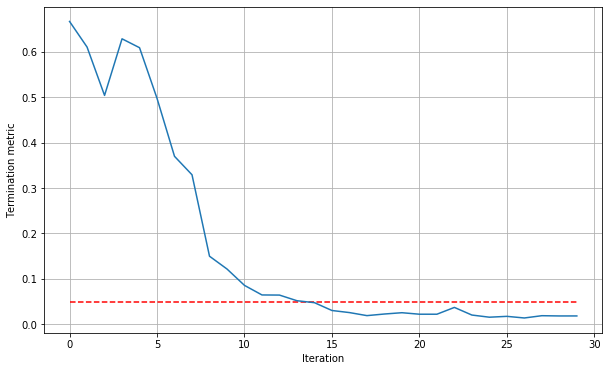

In [6]:
# plotting termination metric
plt.figure(figsize=(10,6))
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.grid()
plt.show()